In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

def survival(AB, doseGy):
    return np.exp(-doseGy - (1/AB)*np.square(doseGy))

# Test, returns 1.0
#AB = 3.0
#doseGy = 0
#survival(AB, doseGy)

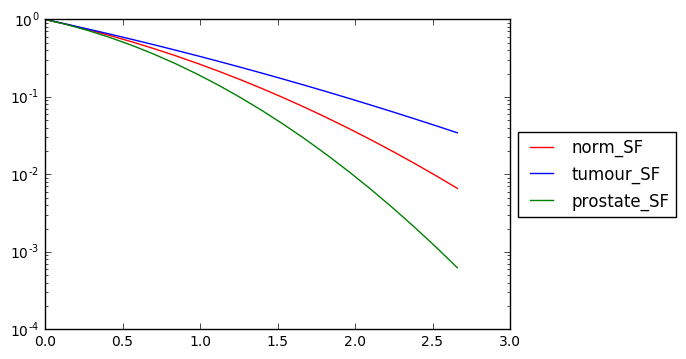

In [118]:
maxdose = 2.66
doseGy = np.linspace(0, maxdose, 20)

# set alpha to 1 and use alpha/beta ratio
prostateAB = 1.5
normAB = 3
tumourAB = 10

plt.plot(doseGy, survival(normAB, doseGy), color='r', label='norm_SF')  #doseGy,
plt.plot(doseGy, survival(tumourAB, doseGy), color='b', label='tumour_SF')
plt.plot(doseGy, survival(prostateAB, doseGy), color='g', label='prostate_SF')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')

In [119]:
#presctiption = 40.0
#fractions = 15.0
#dose_per_fraction = presctiption/fractions

# Model cell survival

In [120]:
def decay_calc(my_input, periods, recovery):
    #my_input = list(range(1,11))
    my_output = []  # dont start from empty list as cant append an empty list
    #periods = 5
    start = 1.0
    #recovery = 2 # recovery factor

    for i in list(range(periods)):
        my_output.extend(list(map((lambda x: start*x), my_input)))
        start = my_output[-1]*recovery
    return np.asarray(my_output)

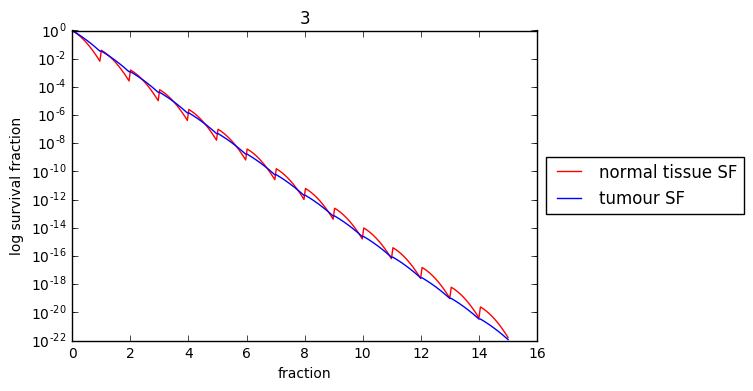

In [127]:
my_norm = survival(normAB, doseGy).tolist()
my_tumour = survival(tumourAB, doseGy).tolist()
periods = 15
norm_recovery =6  # factor for recovery of normal tissue, tumour default = 1, i.e. no recovery

normal_tissue = decay_calc(my_norm, periods, norm_recovery)
tumour_tissue = decay_calc(my_tumour, periods, 1)

time_scale = np.linspace(0, periods, len(normal_tissue))

plt.plot(time_scale, normal_tissue,  color='r', label='normal tissue SF')
plt.plot(time_scale, tumour_tissue, color='b', label='tumour SF')
plt.title('%s' % normAB)
plt.yscale('log')
plt.ylabel('log survival fraction')
plt.xlabel('fraction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

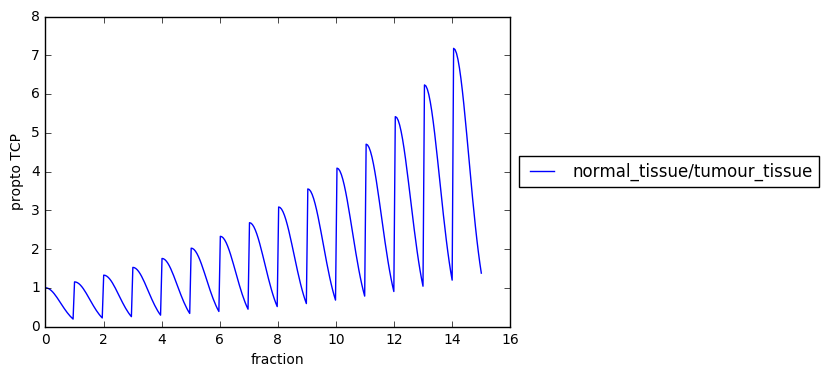

In [128]:
plt.plot(time_scale, normal_tissue/tumour_tissue, color='b', label='normal_tissue/tumour_tissue')
#plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('propto TCP')
plt.xlabel('fraction')